## Importing the libraries

In [1]:
import requests
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## json Request from API

In [2]:
HOST = 'https://api.meteo.lt/v1'
r = requests.get(HOST+'/places/vilnius/forecasts/long-term')
json = r.json()

In [3]:
time_stamp = 'Forecast_at_' + datetime.now().strftime("%Y_%m_%d_%H_%M") + '.csv'
print(time_stamp)

Forecast_at_2024_05_24_11_46.csv


## Converting json to dataframe

In [4]:
dataset = pd.DataFrame.from_dict(json['forecastTimestamps'])

## Checking for NaN values

In [5]:
dataset.isnull().values.any()

True

In [6]:
dataset.isnull().sum()

forecastTimeUtc         0
airTemperature          0
feelsLikeTemperature    0
windSpeed               0
windGust                0
windDirection           0
cloudCover              0
seaLevelPressure        0
relativeHumidity        4
totalPrecipitation      0
conditionCode           0
dtype: int64

## Saving dataframe to .csv file

In [7]:
dataset.to_csv(time_stamp, index=False)

## Plotting dataframe

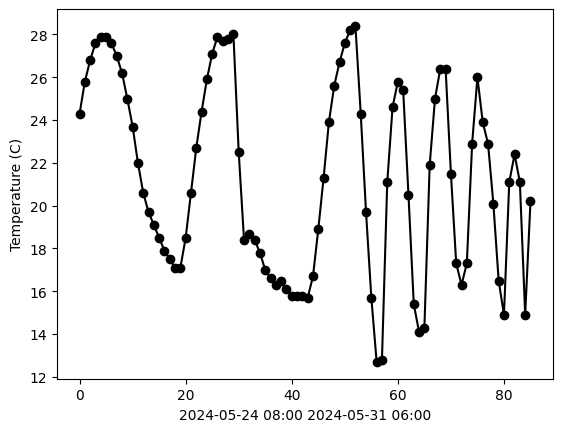

In [8]:
plt.plot(dataset['forecastTimeUtc'].index[:], dataset.iloc[:,1].values, color='black')
plt.scatter(dataset['forecastTimeUtc'].index[:], dataset.iloc[:,1].values, color='black')
plt.xlabel(dataset.iloc[0,0][0:-3] + " " + dataset.iloc[-1,0][0:-3])
plt.ylabel('Temperature (C)')
plt.show()

## Filtering dataframe by hour

In [9]:
# data_by_hour = dataset[dataset['forecastTimeUtc'].str.contains('00:00:00')]

In [10]:
# plt.plot(data_by_hour['forecastTimeUtc'].index[:56], data_by_hour['airTemperature'], color='red')
# plt.xlabel(dataset.iloc[0,0][0:11] + dataset.iloc[-1,0][0:10])
# plt.ylabel('Temperature (C)')
# plt.show()

## Splitting dataframe to X and y dataframes

In [11]:
X = dataset.iloc[:, 3:].values
y = dataset.iloc[:,1].values

## Encoding categorical data

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

## Filling missing dataframe values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)

## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Training the Decision Tree Regression model on the Training set

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Visualising the Decision Tree Regression results with dataframe results

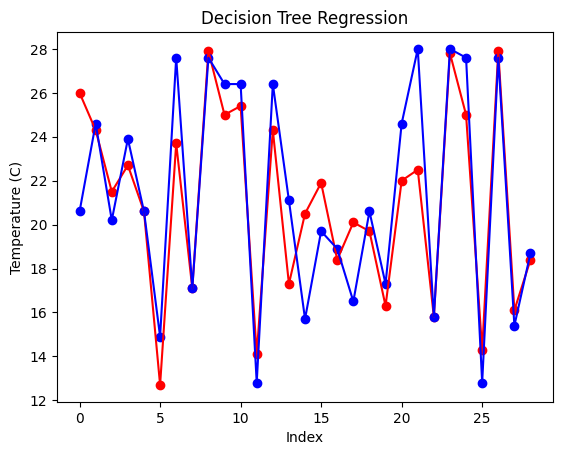

In [16]:
plt.scatter(dataset.index[0:len(y_test)], y_test, color = 'red')
plt.scatter(dataset.index[0:len(y_test)], regressor.predict(X_test), color = 'blue')
plt.plot(dataset.index[0:len(y_test)], y_test, color = 'red')
plt.plot(dataset.index[0:len(y_test)], regressor.predict(X_test), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Index')
plt.ylabel('Temperature (C)')
plt.show()

## Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[20.6 26. ]
 [24.6 24.3]
 [20.2 21.5]
 [23.9 22.7]
 [20.6 20.6]
 [14.9 12.7]
 [27.6 23.7]
 [17.1 17.1]
 [27.6 27.9]
 [26.4 25. ]
 [26.4 25.4]
 [12.8 14.1]
 [26.4 24.3]
 [21.1 17.3]
 [15.7 20.5]
 [19.7 21.9]
 [18.9 18.4]
 [16.5 20.1]
 [20.6 19.7]
 [17.3 16.3]
 [24.6 22. ]
 [28.  22.5]
 [15.8 15.8]
 [28.  27.8]
 [27.6 25. ]
 [12.8 14.3]
 [27.6 27.9]
 [15.4 16.1]
 [18.7 18.4]]


## Evaluating the Model Performance

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6897631560932702